Belen Gutierrez

12/8/23

Final Project

In [108]:
import pandas as pd
import matplotlib as plt
import seaborn as sns

In [109]:
maternalFile = "/Users/belengutierrez/Desktop/Python/Maternal Health Risk Data Set.csv"
maternalRisk = pd.read_csv(maternalFile, parse_dates = True)

In [110]:
maternalRisk2 = maternalRisk.dropna()

In [111]:
mask = maternalRisk2['HeartRate'] <= 30
maternalRisk3 = maternalRisk2[~mask]

In [112]:
maternalRisk3.loc[maternalRisk3["RiskLevel"] == "low risk", "RiskLevel"] = 1
maternalRisk3.loc[maternalRisk3["RiskLevel"] == "mid risk", "RiskLevel"] = 2
maternalRisk3.loc[maternalRisk3["RiskLevel"] == "high risk", "RiskLevel"] = 3

In [113]:
maternalRisk3.rename(columns={"BS": "BS (mmol/L)"})

,Age,SystolicBP,DiastolicBP,BS (mmol/L),BodyTemp,HeartRate,RiskLevel
0,25,130,80,15.0,98.0,86,3
1,35,140,90,13.0,98.0,70,3
2,29,90,70,8.0,100.0,80,3
3,30,140,85,7.0,98.0,70,3
4,35,120,60,6.1,98.0,76,1
...,...,...,...,...,...,...,...
1009,22,120,60,15.0,98.0,80,3
1010,55,120,90,18.0,98.0,60,3
1011,35,85,60,19.0,98.0,86,3
1012,43,120,90,18.0,98.0,70,3


# Questions #
Does age have a significant impact on blood pressure, both systolic and diastolic?

What increases mortality risk the most: having a low blood pressure (90/60 or less) or having a high blood pressure (130/80 or more)?

Does having a high body temperature correspond with having a fast heart rate?

Which has a greater impact on mortality risk: blood pressure or heart rate?

Does a higher age of pregnancy increase the risk of mortality?

### Age blood pressure ###

In [170]:
uniqueAge = maternalRisk3.Age.unique()
uniqueAge.sort()
uniqueAge

array([10, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27,
       28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44,
       45, 46, 48, 49, 50, 51, 54, 55, 56, 59, 60, 62, 63, 65, 66, 70])

### Sidenote: ###
I did some research and found out that the oldest mother to conceive naturally was 59 years old. All the conceptions I read about afterwards were done via in-vitro fertilization. I would consider this as a variable for analysis, but technically I do not know for sure that all the women over 59 in this dataset had in-vitro fertilizition. Furthermore, I do not know which mothers 59 and younger, if any, had in-vitro fertilization. I really hope that the youngest mothers did, but I cannot be certain.

In [171]:
bpCounts = maternalRisk3.groupby(['SystolicBP', 'DiastolicBP', 'Age']).size().reset_index(name = 'Count')

<Axes: xlabel='SystolicBP', ylabel='DiastolicBP'>

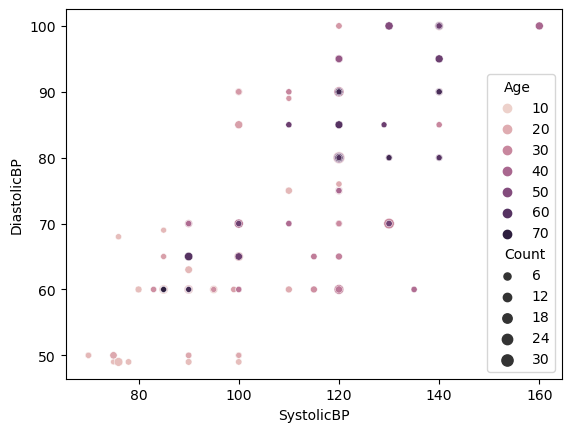

In [178]:
sns.scatterplot(data=bpCounts, x='SystolicBP', y='DiastolicBP', hue = 'Age', size = 'Count', legend='brief')

### RiskLevel BP ###

<Axes: xlabel='SystolicBP', ylabel='DiastolicBP'>

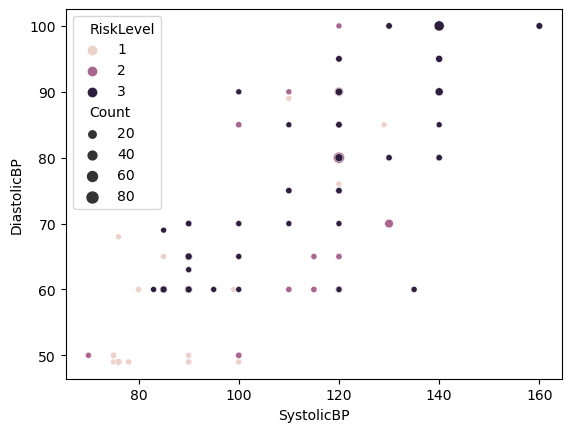

In [175]:
bpRiskCounts = maternalRisk3.groupby(['SystolicBP', 'DiastolicBP', 'RiskLevel']).size().reset_index(name = 'Count')
sns.scatterplot(data=bpRiskCounts, x='SystolicBP', y='DiastolicBP', hue = 'RiskLevel', size = 'Count', legend='brief')

### BodyTemp HeartRate ###

<Axes: xlabel='HeartRate', ylabel='BodyTemp'>

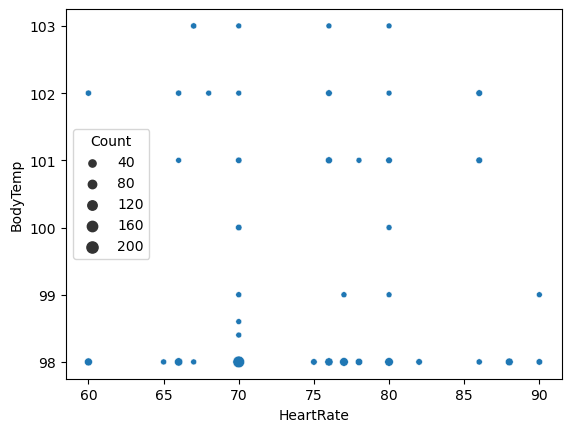

In [137]:
tempCounts = maternalRisk3.groupby(['HeartRate', 'BodyTemp']).size().reset_index(name = 'Count')
sns.scatterplot(data=tempCounts, x='HeartRate', y='BodyTemp', size='Count')

### RiskLevel HeartRate BP ###

<Axes: xlabel='RiskLevel', ylabel='HeartRate'>

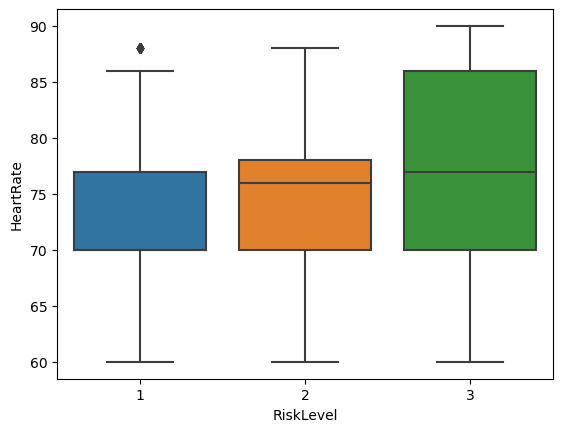

In [176]:
sns.boxplot(x='RiskLevel', y='HeartRate', data = maternalRisk3)

<Axes: xlabel='RiskLevel', ylabel='SystolicBP'>

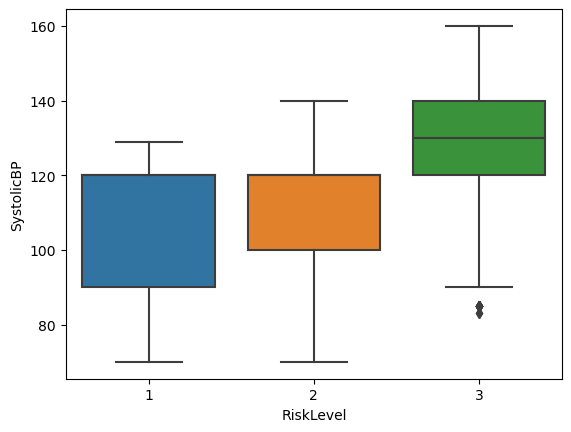

In [177]:
sns.boxplot(x='RiskLevel', y='SystolicBP', data = maternalRisk3)

### Age RiskLevel ###

<Axes: xlabel='RiskLevel', ylabel='Age'>

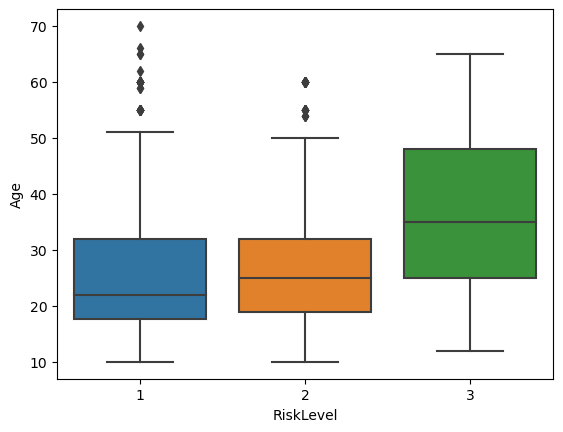

In [163]:
ageCounts = maternalRisk3.groupby(['Age', 'RiskLevel']).size().reset_index(name = 'Count')
#sns.scatterplot(data=ageCounts, x='Age', y='RiskLevel', hue='Count')
#3 = high risk
#
sns.boxplot(x='RiskLevel', y='Age', data=maternalRisk3)